### Titles:
#### Introduction 
#### Preparation
#### A quick glance on train and test dataset
#### 1.Find the class that saved more than others?
#### 2.Average age of the deceased and survivors
#### Interesting informations

### Introduction
#### The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster. Titanic has inspired countless books, articles and films (including the 1997 “Titanic” movie starring Kate Winslet and Leonardo DiCaprio).I'm going to do an interesting analysis.

### Preparation

In [69]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [70]:
train = pd.read_csv(r"C:\Users\lenovo\Downloads\titanic\train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
gd = pd.read_csv(r"C:\Users\lenovo\Downloads\titanic\gender_submission.csv")
gd

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
test = pd.read_csv(r"C:\Users\lenovo\Downloads\titanic\test.csv")
test 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### A quick glance on train and test dataset

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
train.shape

(891, 12)

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [76]:
test.shape

(418, 11)

### Find the class that saved more than others?
#### I don't use 'test' set,because it doesn't have survival information. 

First I changed the data types to show which of the classes saved more.Then I changed the data in the Survived column to understand which of them survived and which died.In my case,0 = False,1 = True.

In [77]:
train['Survived'] = train['Survived'].astype(str)
train['Pclass'] = train['Pclass'].astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [78]:
train['Survived'] = train['Survived'].replace(['1'],'True')
train['Survived'] = train['Survived'].replace(['0'],'False')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here I used seaborn for visualize

<AxesSubplot:xlabel='Survived', ylabel='count'>

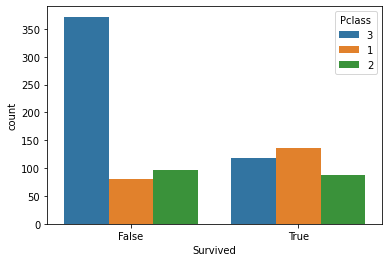

In [92]:
sns.countplot(data=train, x='Survived', hue='Pclass')

I copied the Pclass column to see the ratio of dead to survivors.We can see that the first class saved 63 percent of people. The second 47, the third 24.

In [94]:
train['Copy'] = train['Pclass']
train.groupby(['Survived','Pclass']).agg('count')

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived Pclass                                                            
False    1                80    80   80   64     80     80      80    80   
         2                97    97   97   90     97     97      97    97   
         3               372   372  372  270    372    372     372   372   
True     1               136   136  136  122    136    136     136   136   
         2                87    87   87   83     87     87      87    87   
         3               119   119  119   85    119    119     119   119   

                 Cabin  Embarked  Copy  
Survived Pclass                         
False    1          59        80    80  
         2           3        97    97  
         3           6       372   372  
True     1         117       134   136  
         2          13        87    87  
         3           6       119   119

### 2.Average age of the deceased and survivors

In [100]:
train.groupby(['Survived']).agg('mean')

,PassengerId,Age,SibSp,Parch,Fare
Survived,,,,,
False,447.016393,30.626179,0.553734,0.329690,22.117887
True,444.368421,28.343690,0.473684,0.464912,48.395408


In [125]:
train['Age'].agg('min')

0.42

In [126]:
train['Age'].agg('max')

80.0

### Interesting informations
Now I want to know who was more likely to survive, the rich or vice versa?
First we need to divide people into rich, middle and poor

In [146]:
train['Status'] = train['Fare'].apply(lambda x: 'rich' if x > 150 else 'middle' if 50<=x<=150 else 'poor')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Copy,Status
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,poor
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,middle
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,poor
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,middle
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2,poor
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,poor
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,poor
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,poor


This graph shows us the wrong statistics, because here we took the general statistics. And we need to count separately.

<AxesSubplot:xlabel='Survived', ylabel='count'>

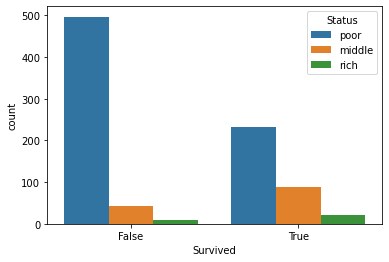

In [147]:
sns.countplot(data=train, x='Survived', hue='Status')

32% - poor
67.4% - middle 
69% - rich
That is, in that ship, the more money you have, the more chances you had to survive. But, I don’t think it has to do with money. Because, in such critical cases, money doesn’t solve much. Here, those who had more desire to live were more likely to survive. But, of course, this is just my opinion. I also do not exclude that there could be other reasons.

In [148]:
train.groupby(['Survived','Status']).agg('count')

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Survived Status                                                              
False    middle           43      43    43   43   33     43     43      43   
         poor            497     497   497  497  384    497    497     497   
         rich              9       9     9    9    7      9      9       9   
True     middle           89      89    89   89   78     89     89      89   
         poor            233     233   233  233  192    233    233     233   
         rich             20      20    20   20   20     20     20      20   

                 Fare  Cabin  Embarked  Copy  
Survived Status                               
False    middle    43     25        43    43  
         poor     497     35       497   497  
         rich       9      8         9     9  
True     middle    89     73        87    89  
         poor     233     47       233   233  
         rich      20     16        20    20

### How Age May Have Affected Your Survival?
First, we also divide the age column by three. Then we look at the ratio of survivors.

In [157]:
train['Measure'] = train['Age'].apply(lambda x: 'old' if x > 55 else 'middle' if 16<=x<=54 else 'young')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Copy,Status,Measure
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,poor,middle
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,middle,middle
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,poor,middle
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,middle,middle
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,poor,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2,poor,middle
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,poor,middle
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,poor,young
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,poor,middle


<AxesSubplot:xlabel='Survived', ylabel='count'>

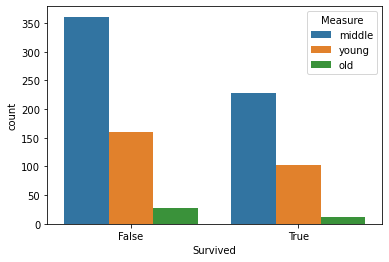

In [158]:
sns.countplot(data=train, x='Survived', hue='Measure')

In [159]:
train.groupby(['Survived','Measure']).agg('count')

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Survived Measure                                                              
False    middle           361     361   361  361  361    361    361     361   
         old               28      28    28   28   28     28     28      28   
         young            160     160   160  160   35    160    160     160   
True     middle           228     228   228  228  228    228    228     228   
         old               12      12    12   12   12     12     12      12   
         young            102     102   102  102   50    102    102     102   

                  Fare  Cabin  Embarked  Copy  Status  
Survived Measure                                       
False    middle    361     45       361   361     361  
         old        28     12        28    28      28  
         young     160     11       160   160     160  
True     middle    228    104       227   228     228  
         old        12     10        11    12      12  
         young     102     22       102   102     102

Old - 30% 
Middle - 38,7%
Young - 63,75%
The younger you are, the more chances you have to survive.